# Here I test how to prepare initial AFM state of the system

In [3]:
#Qiskit modules
import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.primitives import StatevectorSampler, StatevectorEstimator
from qiskit.quantum_info import SparsePauliOp

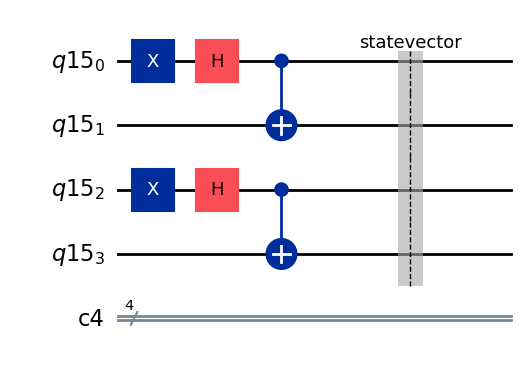

In [14]:
n_sites = 2
n_qubits = n_sites *2
q_r = Q_R(n_qubits)
c_r = C_R(n_qubits)
qc_init = QuantumCircuit(q_r,c_r)

for i in range(n_sites):
    qc_init.x((i - 1) * 2)

for i in range(n_sites):
    qc_init.h((i - 1) * 2)
    qc_init.cx((i - 1) * 2, (i - 1) * 2 + 1)

#qc_init.h(n_qubits - 1)
#qc_init.cx(n_qubits - 1, 0)

#for i in range(n_qubits):
#    qc_init.measure(i,i)

qc_init.save_statevector()

qc_init.draw('mpl')



In [15]:
SimulatorAer = AerSimulator()
circ = transpile(qc_init, backend = SimulatorAer)
result = SimulatorAer.run(circ,shots = 1).result()
ground_state = result.get_statevector(circ)

import sys
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')
import aux_func as af
n_nonzero = 0
n_states = pow(2, 2 * n_sites)
states = []
prob = []
for i in range(n_states):
    pr = pow(abs(ground_state[i]), 2)
    if pr>1/n_states:
        n_nonzero = n_nonzero + 1
        states.append(i)
        prob.append(pr)
        print('state: ' + str(af.int_2_bin_word(i, 2 * n_sites)) + ', prob: ' + str(pr) + ', complex amplitude: ' + str(ground_state[i]))
    


state: 0000, prob: 0.2500000000000001, complex amplitude: (0.5000000000000001+0j)
state: 0011, prob: 0.2500000000000001, complex amplitude: (-0.5000000000000001-6.123233995736767e-17j)
state: 1100, prob: 0.2500000000000001, complex amplitude: (-0.5000000000000001-6.123233995736767e-17j)
state: 1111, prob: 0.2500000000000001, complex amplitude: (0.5000000000000001+1.2246467991473535e-16j)
